In [1]:
# Oasis Infobyte 
# Data Science Internship 
# Task 5 Sales Prediction Using Python
# Submitted by - Sahil Sahu 

In [2]:
# Problem Statement 

In [3]:
# Sales prediction means predicting how much of a product people will buy based on factors
# such as the amount you spend to advertise your product, the segment of people you
# advertise for, or the platform you are advertising on about your product.
# Typically, a product and service-based business always need their Data Scientist to predict
# their future sales with every step they take to manipulate the cost of advertising their
# product.

In [4]:
# Importing Necessary Libraries 

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.metrics import mean_absolute_error
from IPython.display import display

In [6]:
# Importing the Given Dataset 

In [7]:
df=pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")
df=df.drop('Unnamed: 0', axis=1)
print ("Given Dataset:")
df

Given Dataset:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
# Reading and Understanding the Given Dataset

In [9]:
df.shape

(200, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [13]:
# Dataset was Successfully Read and Understood 

In [14]:
# Checking for any Missing Values or Duplicates 

In [15]:
df.isnull().values.any()
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
# Using Seaborn Library 

In [18]:
# Visualizing the Relationship between Variable "TV" and Variable "Sales"
# Visualizing the Relationship between Variable "Radio" and Variable "Sales"
# Visualizing the Relationship between Variable "Newspapers" and Variable "Sales"

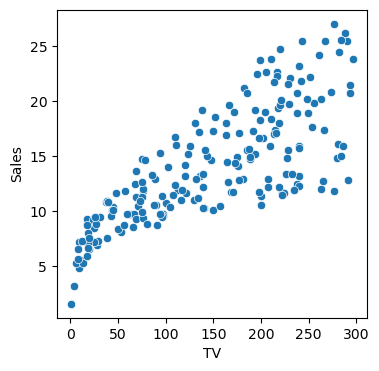

In [19]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

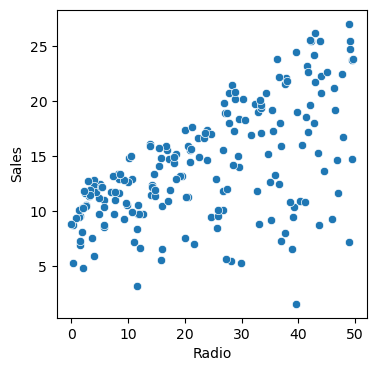

In [20]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

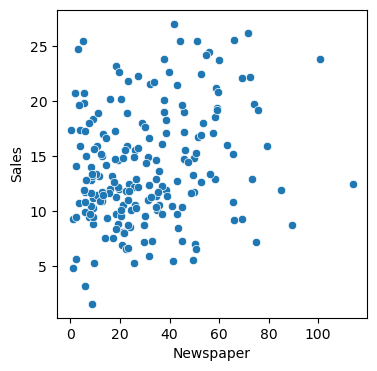

In [21]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

In [22]:
# Checking main assumptions of Linear Regression:
# Linearity 
# Normality
# Multicollinearity

In [23]:
# Linearity 

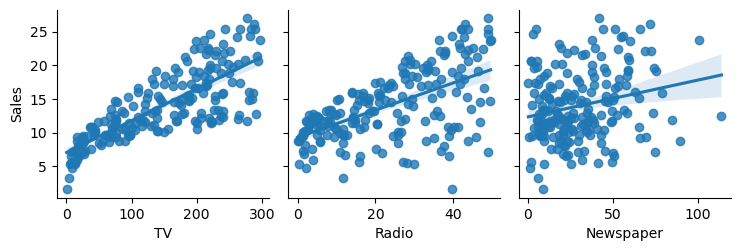

In [24]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

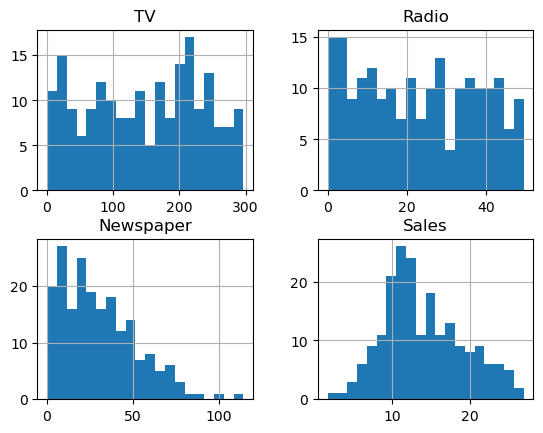

In [25]:
df.hist(bins=20)

In [26]:
# Normality 

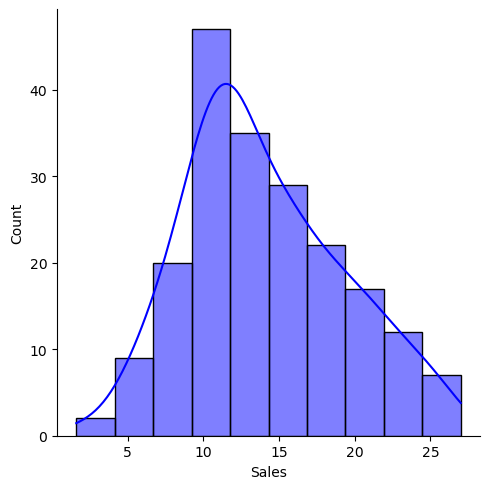

In [27]:
sns.displot(df.Sales, bins=10, color="blue", kde=True)

In [28]:
# Multicollinearity

In [29]:
num_cols = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


In [30]:
# Correlation of Different variables using Heatmap 

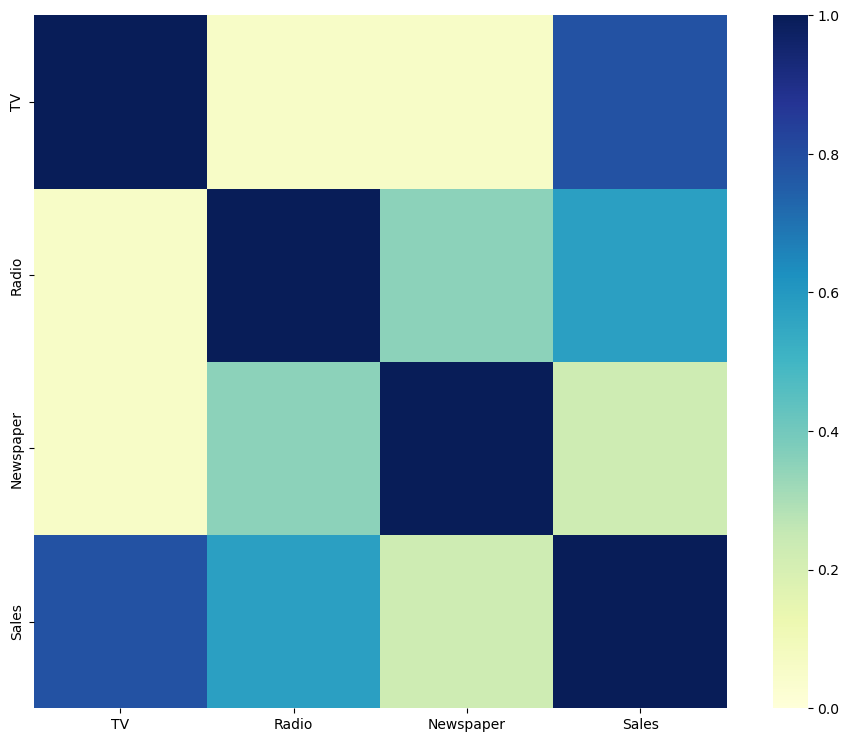

In [31]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

In [32]:
#There is no multicolinearity between among independent/dependent variable

In [33]:
# Splitting Data 
# Using Train-Test Split

In [34]:
features = ["TV", "Radio", "Newspaper"]
X = df[features]
target = "Sales"
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [35]:
# Building the Model

In [36]:
y_mean = y_train.mean()
print("Mean Error: ", y_mean)
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline Error: ", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("MAE Baseline: ", mae_baseline)

Mean Error:  14.1
Baseline Error:  [14.1, 14.1, 14.1, 14.1, 14.1]
MAE Baseline:  4.12


In [37]:
# Model Instantiation

In [38]:
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [39]:
# Prediction on the Training Data 

In [40]:
y_pred_training = model.predict(X_train)
print("Predicted values after model: ", y_pred_training[:5])
mae_pred_training = mean_absolute_error(y_train, y_pred_training)
print("MAE for training data after prediction: ", mae_pred_training)

Predicted values after model:  [ 9.68827502 12.67337707 10.0553326   8.20010235 13.49562077]
MAE for training data after prediction:  1.1984678961500137


In [41]:
# Prediction on Test Data 

In [42]:
y_pred_test = model.predict(X_test)
print("Predicted values after model: ", y_pred_test[:5])
mae_pred_test = mean_absolute_error(y_test, y_pred_test)
print("MAE for test data after prediction: ", mae_pred_test)

Predicted values after model:  [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326]
MAE for test data after prediction:  1.4607567168117603


In [43]:
# Extracting Intercept and Coefficient 

In [44]:
intercept = model.intercept_
intercept

2.979067338122629

In [45]:
coefficient = model.coef_
coefficient

array([0.04472952, 0.18919505, 0.00276111])

In [46]:
# Multi-Linear Regression Equation

In [47]:
print(f"Sales = {intercept} + {coefficient[0]} * TV + {coefficient[1]} * Radio + {coefficient[2]} * Newspaper")

Sales = 2.979067338122629 + 0.044729517468716326 * TV + 0.18919505423437652 * Radio + 0.0027611143413671935 * Newspaper


In [48]:
# Model Evaluation

In [49]:
print("Score of training data: ", model.score(X_train, y_train))
print("Score of test data: ", model.score(X_train, y_train))

Score of training data:  0.8957008271017818
Score of test data:  0.8957008271017818


In [50]:
# Actual vs Prediction 
# Training Data 

Text(0.5, 1.0, 'Actual vs Predicted [Training Data]')

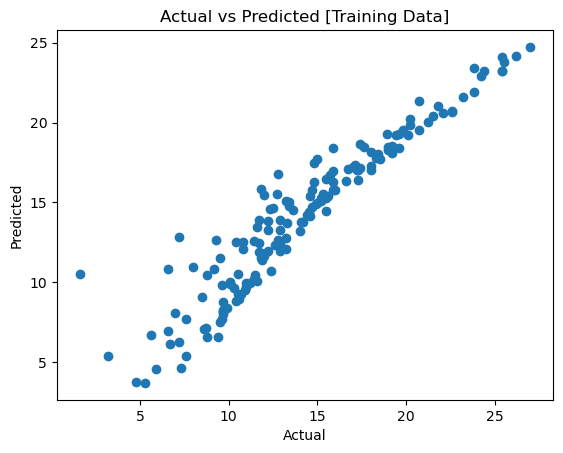

In [51]:
plt.scatter(y_train, y_pred_training)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Training Data]")

In [52]:
# Actual Prediction 
# Test Data 

Text(0.5, 1.0, 'Actual vs Predicted [Test Data]')

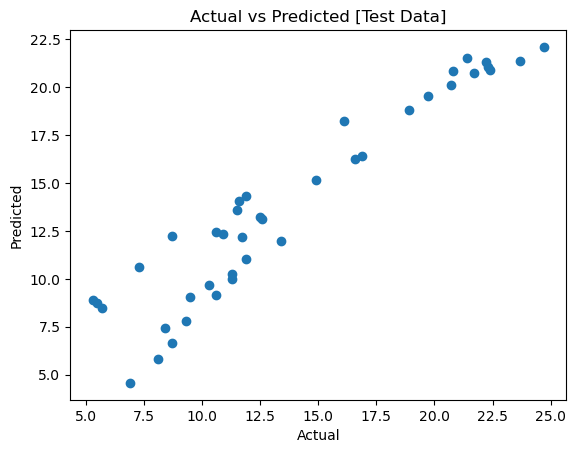

In [53]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Test Data]")

In [54]:
# Creating Dataframe of Actual vs Predicted Sales 

In [55]:
print ("Dataframe:")
y_pred_test_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
y_pred_test_df.head()

Dataframe:


,Actual,Predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373


In [56]:
# Thankyou